# Titanic Analysis
This analysis explores patterns in the Titanic dataset to understand factors affecting passenger survival. Using Python libraries such as pandas, seaborn, and matplotlib, we examine how survival is influenced by age, gender, passenger class, fare paid, and embarkation point. In this project we are trying to find answer to these questions:

- What is the average age of the people who survived?
- Which gender had a higher survival rate, male of female?
- Using matplotlib and pandas create the following visualisations:
- Survival Rate by Passenger Class – A bar chart comparing survival rates across 1st, 2nd, and 3rd class.
- Average Fare Paid by Survivors vs. Non-Survivors – A bar chart comparing fares paid by survivors and non-survivors.
- Number of Survivors by Embarkation Point – A bar chart showing the number of survivors from different embarkation points.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Previewing the Titanic Dataset

We start by loading **`titanic3.csv`** into a pandas DataFrame and displaying the first five rows. The table below describe each column of the data.


| Column        | Meaning                                                           |
| ------------- | ----------------------------------------------------------------- |
| **pclass**    | Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)                       |
| **survived**  | Survival flag (1 = survived, 0 = did not)                         |
| **name**      | Passenger’s full name                                             |
| **sex**       | Gender of the passenger                                           |
| **age**       | Age in years                                                      |
| **sibsp**     | Number of siblings/spouses aboard                                 |
| **parch**     | Number of parents/children aboard                                 |
| **ticket**    | Ticket number                                                     |
| **fare**      | Ticket fare                                                       |
| **cabin**     | Cabin number                                                      |
| **embarked**  | Port of embarkation (C =Cherbourg, Q =Queenstown, S =Southampton) |
| **boat**      | Lifeboat number, if rescued                                       |
| **body**      | Body identification number                                        |
| **home.dest** | Intended destination                                              |

In [11]:
titanic = pd.read_csv("./titanic3.csv")
print(titanic.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

### What is the average age of the people who survived?

The data show that survivors were, on average, **28.92** years old, while non-survivors averaged **30.55** years. These means are printed and displayed in a simple two-bar chart.

Average age of survivors: 28.92
Average age of non-survivors: 30.55


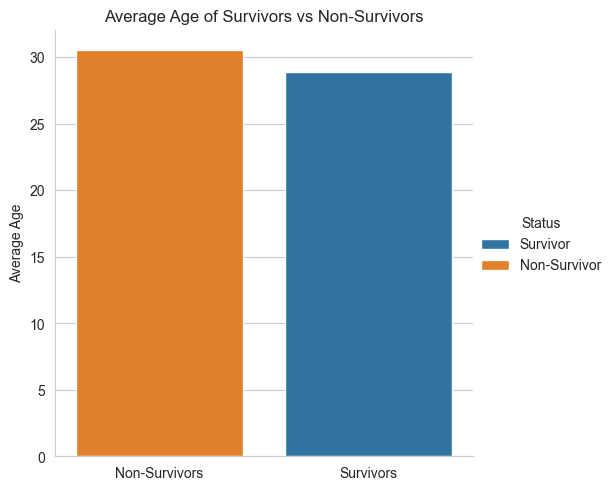

In [12]:
titanic1 = titanic.dropna(subset=["age", "survived"]).copy()
avg_age_survived = titanic1[titanic1["survived"] == 1]["age"].mean()
avg_age_non_survived = titanic1[titanic1["survived"] == 0]["age"].mean()
print(f"Average age of survivors: {avg_age_survived:.2f}")
print(f"Average age of non-survivors: {avg_age_non_survived:.2f}")

titanic1["Status"] = titanic1["survived"].replace({0: "Non-Survivor", 1: "Survivor"})

sns.set_style(style="whitegrid")
sns.catplot(
    x="survived",
    y="age",
    data=titanic1,
    kind="bar",
    hue="Status",
    hue_order=["Survivor", "Non-Survivor"],
    errorbar=None,
)
plt.title("Average Age of Survivors vs Non-Survivors")
plt.xlabel("")
plt.ylabel("Average Age")
plt.xticks([0, 1], ["Non-Survivors", "Survivors"])
plt.show()

### Which gender had a higher survival rate, male of female?

We compute each gender’s mean survival rate: **female: 72.75 %** and **male: 19.10 %**. These figures are printed and visualised in a bar chart.

female: 72.75 %
male: 19.1 %


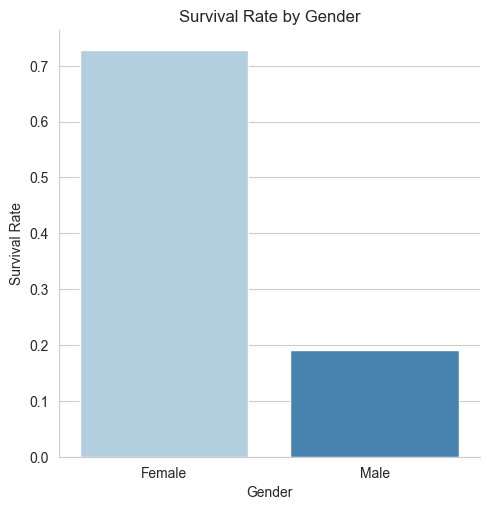

In [ ]:
titanic2 = titanic.dropna(subset=["sex", "survived"]).copy()
survival_by_gender = titanic2.groupby("sex")["survived"].mean()

higher_survival = survival_by_gender.idxmax()
higher_survival_rate = survival_by_gender.max() * 100

lower_survival = survival_by_gender.idxmin()
lower_survival_rate = survival_by_gender.min() * 100

print(f"{higher_survival}: {round(higher_survival_rate, 2)} %")
print(f"{lower_survival}: {round(lower_survival_rate, 2)} %")

sns.set_style(style="whitegrid")
sns.catplot(
    x="sex",
    y="survived",
    data=titanic2,
    kind="bar",
    hue="sex",
    palette="Blues",
    errorbar=None,
)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

### Survival Rate by Passenger Class – A bar chart comparing survival rates across 1st, 2nd, and 3rd class.

These figures are plotted in a three-bar chart, revealing that higher-fare, higher-class passengers had the greatest likelihood of surviving

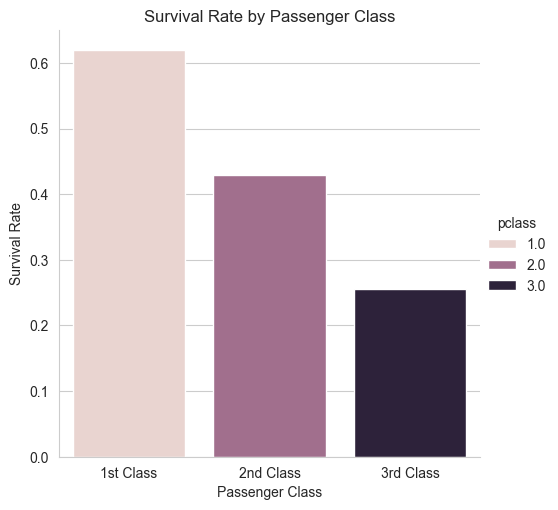

In [ ]:
titanic3 = titanic.dropna(subset=["pclass", "survived"]).copy()

sns.set_style(style="whitegrid")
sns.catplot(
    x="pclass", y="survived", data=titanic3, kind="bar", hue="pclass", errorbar=None
)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks([0, 1, 2], ["1st Class", "2nd Class", "3rd Class"])
plt.show()

### Average Fare Paid by Survivors vs. Non-Survivors – A bar chart comparing fares paid by survivors and non-survivors.

We compare the mean ticket prices of the two groups. The accompanying two-bar chart makes the gap unmistakable, reinforcing the link between higher fares and the likelihood of survival.

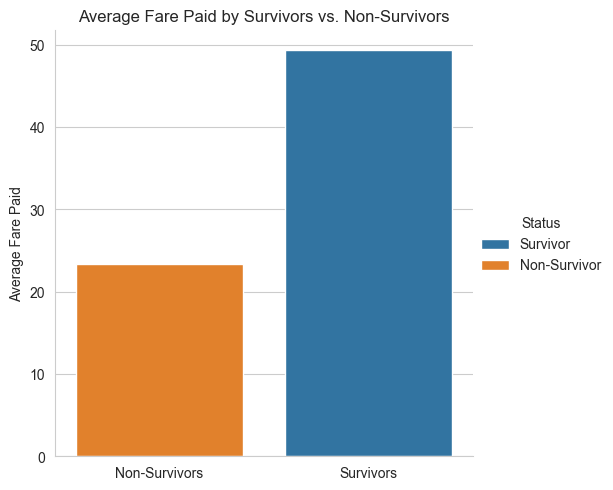

In [ ]:
titanic4 = titanic.dropna(subset=["fare", "survived"]).copy()

titanic4["Status"] = titanic4["survived"].replace({0: "Non-Survivor", 1: "Survivor"})

sns.set_style(style="whitegrid")
sns.catplot(
    x="survived",
    y="fare",
    data=titanic4,
    kind="bar",
    hue="Status",
    hue_order=["Survivor", "Non-Survivor"],
    errorbar=None,
)
plt.title("Average Fare Paid by Survivors vs. Non-Survivors")
plt.xlabel("")
plt.ylabel("Average Fare Paid")
plt.xticks([0, 1], ["Non-Survivors", "Survivors"])
plt.show()

### Number of Survivors by Embarkation Point – A bar chart showing the number of survivors from different embarkation points.

Southampton supplied the largest absolute number of survivors, while Cherbourg shows a strong survival presence relative to its smaller passenger base.

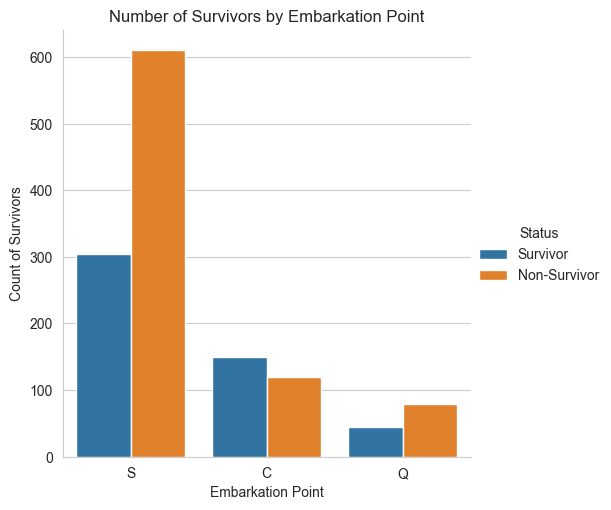

In [ ]:
titanic5 = titanic.dropna(subset=["embarked", "survived"]).copy()

titanic5["Status"] = titanic5["survived"].replace({0: "Non-Survivor", 1: "Survivor"})

sns.set_style(style="whitegrid")
sns.catplot(
    x="embarked",
    data=titanic5,
    kind="count",
    hue="Status",
    hue_order=["Survivor", "Non-Survivor"],
)
plt.title("Number of Survivors by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.ylabel("Count of Survivors")
plt.show()

### Fare Distribution by Passenger Class
The box-and-whisker plot displays ticket-price distributions for 1st, 2nd, and 3rd class. The boxes reveal a clear cost hierarchy—median fares climb steeply from 3rd to 1st class—and show that 1st class has the widest, most skewed spread. This visual underscores how strongly price—and by extension cabin class—varied across the Titanic’s passenger tiers.

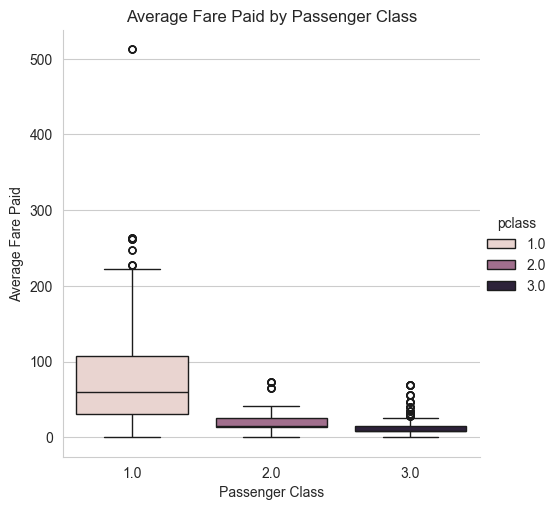

In [7]:
titanic6 = titanic.dropna(subset=["pclass", "fare"]).copy()

sns.set_style(style="whitegrid")
sns.catplot(
    x="pclass", y="fare", data=titanic6, kind="box", hue="pclass", errorbar=None
)
plt.title("Average Fare Paid by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare Paid")
plt.show()

### Passenger Distribution by Age & Sex (Survivors vs Non-Survivors)

We first count how many passengers fall into every combination of age, sex, and survival. Then we make two scatter-plots side by side—one for Survivors and one for Non-Survivors:
- X-axis: passenger age.
- Y-axis & dot size: how many people share that exact age/sex.
- Color: blue tones separate males from females.
  
Bigger dots mean more passengers at that age. Seeing the two panels next to each other quickly shows, the cluster of surviving women and younger children, versus the heavier losses among adult men.

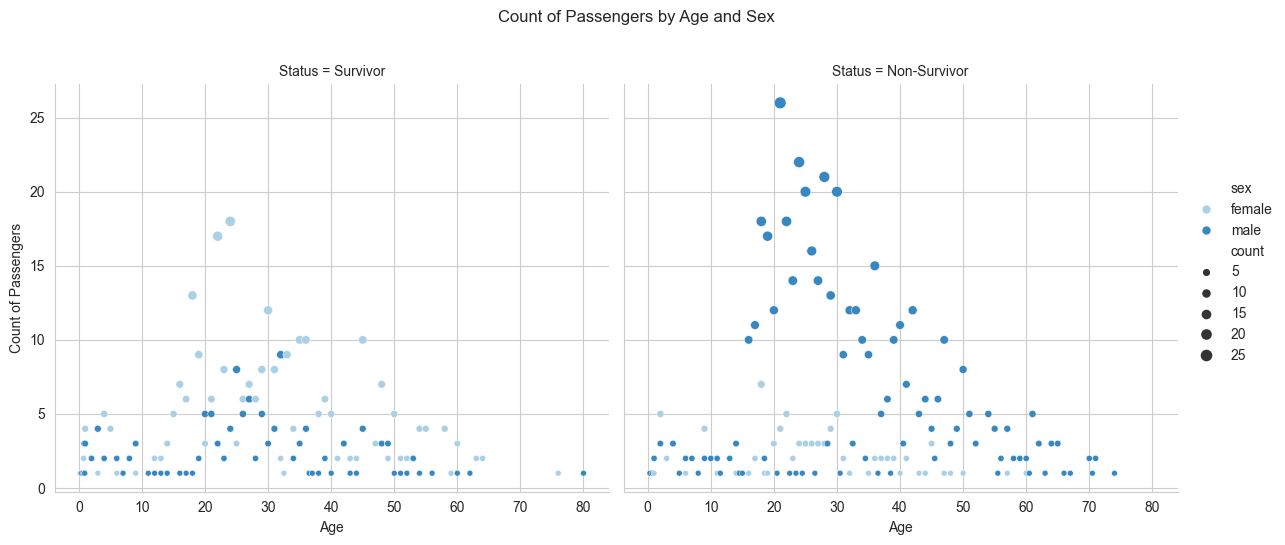

In [8]:
titanic7 = (
    titanic.groupby(["age", "sex", "survived"]).size().reset_index(name="count").copy()
)

titanic7["Status"] = titanic7["survived"].replace({0: "Non-Survivor", 1: "Survivor"})

sns.set_style(style="whitegrid")
g = sns.relplot(
    data=titanic7,
    x="age",
    y="count",
    hue="sex",
    palette="Blues",
    size="count",
    col="Status",
    kind="scatter",
    aspect=1.2,
)
g.fig.suptitle("Count of Passengers by Age and Sex", y=1.08)
g.set_axis_labels("Age", "Count of Passengers")
plt.show()

### Survival Trends Across Age, Ticket Fare, and Class — by Gender

We group passengers by age, fare, class, sex, and survival and count how many share each combination. Two side-by-side scatter-plots then put five details on one picture:

| Visual cue       | Meaning                                   |
| ---------------- | ----------------------------------------- |
| **X-axis**       | Age                                       |
| **Y-axis**       | Fare paid                                 |
| **Marker shape** | ○ = survivor, ✕ = non-survivor            |
| **Dot size**     | Number of people with those exact traits  |


Because the chart is split by sex, you can see patterns such as: high-fare first-class women survived in large numbers, while low-fare third-class men fared worst.

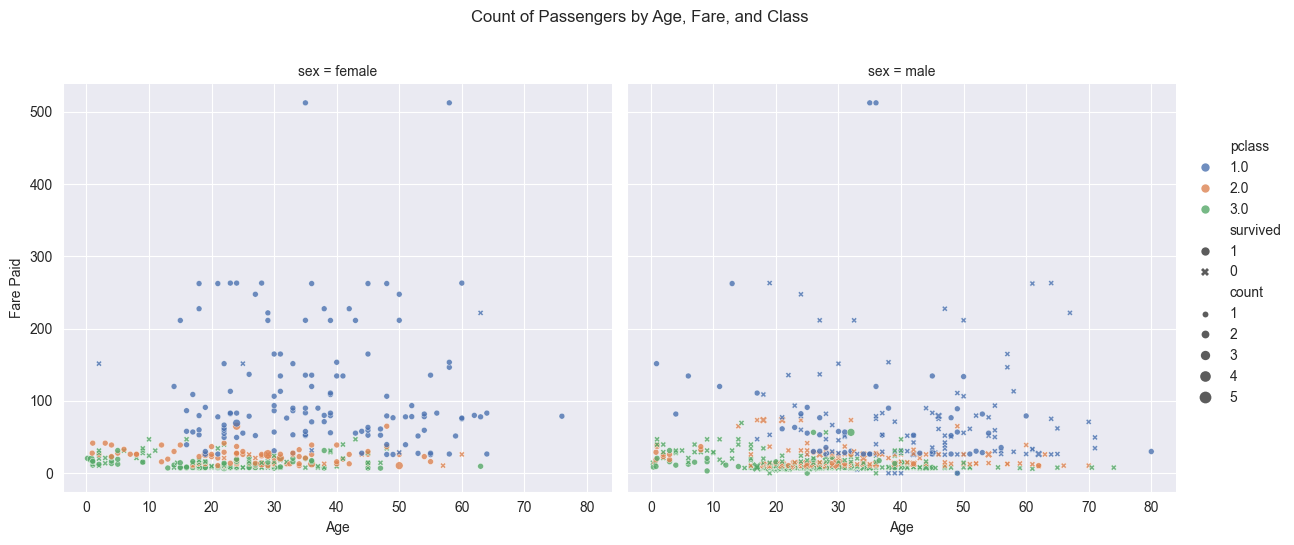

In [9]:
titanic8 = (
    titanic.groupby(["age", "sex", "fare", "survived", "pclass"])
    .size()
    .reset_index(name="count")
)

sns.set_style(style="darkgrid")
g = sns.relplot(
    data=titanic8,
    x="age",
    y="fare",
    hue="pclass",
    palette="deep",
    size="count",
    kind="scatter",
    style="survived",
    style_order=[1, 0],
    col="sex",
    height=5,
    aspect=1.2,
    alpha=0.8,
)
g.fig.suptitle("Count of Passengers by Age, Fare, and Class", y=1.08)
g.set_axis_labels("Age", "Fare Paid")
plt.show()